### Use rel_dictcsv

In [1]:
import os
import sys
# module_path = os.path.abspath(os.path.join('../umlsparser'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt



C:\Users\Ignatius Ting\AppData\Local\Temp\ipykernel_2656\1751670079.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


 UMLS <br>
○ Get familiar with the offline UMLS <br>
○ Be aware of where we're extracting subgraphs<br>
○ Read into what vocabularies<br>
○ Understand what categories and topics really exist<br>
○ What topics and terminologies are being used<br>
○ Check recording at 11:28<br>
○ Diseases drugs and genes<br>
• Use MRCONSO.RRF<br>
○ A few things missing from here from the full UMLS<br>
• MRCONSO.RRF UMLS GitHUB<br>
• BioBART, SciFive - look at these models<br>
○ Do tutorials on these<br>
 T5 and BART tutorials<br>

## Concepts and Sources

In [2]:
# check contents

with open ('../data/META/MRCONSO.RRF') as f:
    for i in range(5):
        line = f.readline()
        print(line)

C0000005|ENG|P|L0000005|PF|S0007492|Y|A26634265||M0019694|D012711|MSH|PEP|D012711|(131)I-Macroaggregated Albumin|0|N|256|

C0000005|ENG|S|L0270109|PF|S0007491|Y|A26634266||M0019694|D012711|MSH|ET|D012711|(131)I-MAA|0|N|256|

C0000005|FRE|P|L6220710|PF|S7133957|Y|A13433185||M0019694|D012711|MSHFRE|PEP|D012711|Macroagrégats d'albumine marquée à l'iode 131|3|N||

C0000005|FRE|S|L6215648|PF|S7133916|Y|A27488794||M0019694|D012711|MSHFRE|ET|D012711|MAA-I 131|3|N||

C0000005|FRE|S|L6215656|PF|S7133956|Y|A27614225||M0019694|D012711|MSHFRE|ET|D012711|Macroagrégats d'albumine humaine marquée à l'iode 131|3|N||



In [3]:
df = pd.read_csv('../data/META/MRCONSO.RRF', delimiter = '|')
df.shape

C:\Users\Ignatius Ting\AppData\Local\Temp\ipykernel_2656\3328187778.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2023AA/META/MRCONSO.RRF', delimiter = '|')


(13501907, 19)

In [4]:
df.head()

,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,Unnamed: 8,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256,Unnamed: 18
0,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0,N,256.0,NaN
1,C0000005,FRE,P,L6220710,PF,S7133957,Y,A13433185,NaN,M0019694,D012711,MSHFRE,PEP,D012711,Macroagrégats d'albumine marquée à l'iode 131,3,N,NaN,NaN
2,C0000005,FRE,S,L6215648,PF,S7133916,Y,A27488794,NaN,M0019694,D012711,MSHFRE,ET,D012711,MAA-I 131,3,N,NaN,NaN
3,C0000005,FRE,S,L6215656,PF,S7133956,Y,A27614225,NaN,M0019694,D012711,MSHFRE,ET,D012711,Macroagrégats d'albumine humaine marquée à l'iode 131,3,N,NaN,NaN
4,C0000005,SWE,P,L17197376,PF,S20758072,Y,A33245954,NaN,M0019694,D012711,MSHSWE,ET,D012711,(131)I-Makroaggregerat albumin,3,N,NaN,NaN


In [5]:
def clean_data(data):
    cols = data.columns
    empty_cols = list(filter(lambda x: 'unnamed' in x.lower(), cols))
    data = data.shift(1)
    data.loc[0] = cols
    for col in empty_cols:
        if data[col].isna().mean() > 0.99:
            data = data.drop(col, axis = 1)
        else:
            data.loc[0,col] = np.nan
    return data

df = clean_data(df)

In [6]:
df.head(2)

,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,Unnamed: 8,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0.0,N,256.0


In [7]:
df.columns = ['CUI','LAT','TS','LUI','STT',
              'SUI','ISPREF','AUI','SAUI',
              'SCUI','SDUI','SAB','TTY',
              'CODE','STR','SRL','SUPPRESS',
              'CVF']

In [8]:
df.head()

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0.0,N,256.0
2,C0000005,FRE,P,L6220710,PF,S7133957,Y,A13433185,NaN,M0019694,D012711,MSHFRE,PEP,D012711,Macroagrégats d'albumine marquée à l'iode 131,3.0,N,NaN
3,C0000005,FRE,S,L6215648,PF,S7133916,Y,A27488794,NaN,M0019694,D012711,MSHFRE,ET,D012711,MAA-I 131,3.0,N,NaN
4,C0000005,FRE,S,L6215656,PF,S7133956,Y,A27614225,NaN,M0019694,D012711,MSHFRE,ET,D012711,Macroagrégats d'albumine humaine marquée à l'iode 131,3.0,N,NaN


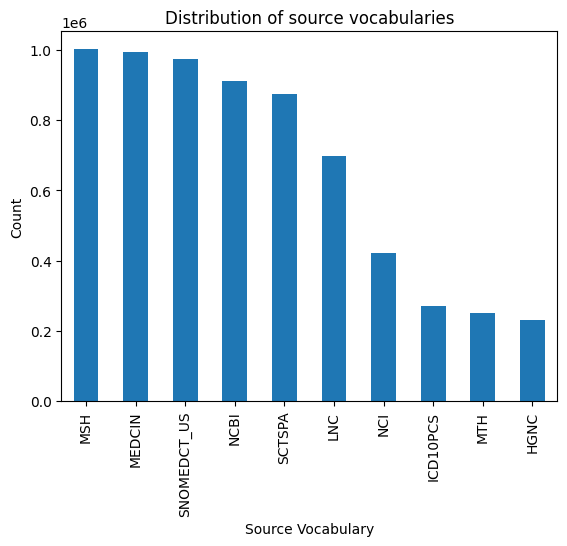

In [9]:
# Source distribution
df.SAB.value_counts()[:10].plot(kind = 'bar')
plt.xlabel("Source Vocabulary")
plt.ylabel("Count")
plt.title("Distribution of source vocabularies")
plt.show()

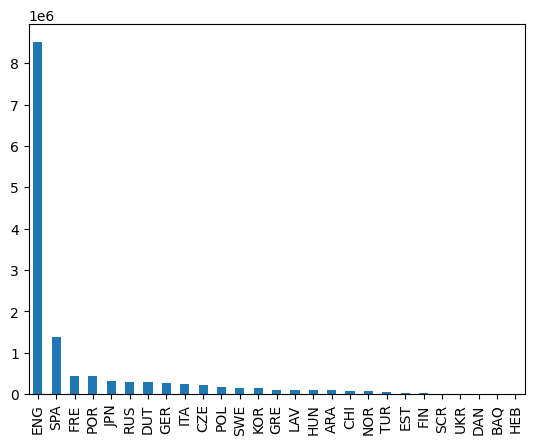

In [10]:
df.LAT.value_counts().plot(kind = 'bar')
plt.show()

In [11]:
# English only
df = df[df.LAT == 'ENG'].reset_index(drop = True)

In [12]:
df.shape

(8510800, 18)

In [13]:
df.head(3)

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0.0,N,256.0
2,C0000039,ENG,P,L0000039,PF,S17175117,N,A28315139,9194921.0,1926948,NaN,RXNORM,IN,1926948,"1,2-dipalmitoylphosphatidylcholine",0.0,N,256.0


In [14]:
# check TTY - term types
# these seem useful
df.TTY.value_counts()

PT             2094740
SY             1335271
FN             793410 
SCN            696462 
NM             321747 
CE             319585 
PN             248479 
ET             197694 
DP             143081 
PM             129283 
HX             112732 
LPDN           110145 
LC             95871  
LN             95871  
MTH_LN         95816  
ACR            85550  
OSN            83459  
PX             80217  
PCE            77920  
LLT            76364  
LPN            69223  
IN             64115  
DN             59598  
BD             56499  
CD             53256  
HT             50271  
CN             47089  
PTCS           44571  
MTH_ACR        43143  
SYN            42780  
NP             38646  
ETAL           36338  
BN             33775  
PTAV           33305  
MH             30454  
PEP            29744  
ETCLIN         28486  
PSN            26363  
AB             23400  
N1             22684  
SU             22509  
PTGB           20659  
LA             19420  
CDD        

In [15]:
type_dict = {}
with open("../data/type_dict.txt") as f:
    text = f.readlines()
    for line in text:
        line = line.strip('\n')
        line = line.split('\t')
        type_dict[line[0]] = line[-1]
    f.close()

df['term_type'] = df['TTY'].apply(lambda x: type_dict.get(x) if not pd.isna(x) else None)

df.head()

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF,term_type
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711.1,(131)I-Macroaggregated Albumin,0,N,256,Preferred entry term
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0.0,N,256.0,Entry term
2,C0000039,ENG,P,L0000039,PF,S17175117,N,A28315139,9194921.0,1926948,NaN,RXNORM,IN,1926948,"1,2-dipalmitoylphosphatidylcholine",0.0,N,256.0,Name for an ingredient
3,C0000039,ENG,P,L0000039,PF,S17175117,Y,A28572604,NaN,NaN,NaN,MTH,PN,NOCODE,"1,2-dipalmitoylphosphatidylcholine",0.0,N,256.0,Metathesaurus preferred name
4,C0000039,ENG,P,L0000039,VC,S0007564,Y,A0016515,NaN,M0023172,D015060,MSH,MH,D015060,"1,2-Dipalmitoylphosphatidylcholine",0.0,N,NaN,Main heading


In [16]:
df['term_type'].value_counts()[:10]

Designated preferred name                 2094740
Designated synonym                        1335271
Full form of descriptor                   793410 
Scientific name                           696462 
Name of Supplementary Concept             321747 
Entry term for a Supplementary Concept    319585 
Metathesaurus preferred name              248479 
Entry term                                197694 
Drug Product                              143081 
Machine permutation                       129283 
Name: term_type, dtype: int64

In [17]:
# df.to_csv('../data/concept.csv', index = False)

In [18]:
df_snomed = df[df.SAB == 'SNOMEDCT_US'].copy().reset_index(drop = True)

## Semantic Types

In [19]:
mrsty = pd.read_csv('../data/META/MRSTY.RRF', delimiter = '|', low_memory = False)
mrsty = clean_data(mrsty)
mrsty.columns = ['CUI','TUI','STN','STY','ATUI','CVF']
mrsty.head()

,CUI,TUI,STN,STY,ATUI,CVF
0,C0000005,T116,A1.4.1.2.1.7,"Amino Acid, Peptide, or Protein",AT17648347,256
1,C0000005,T121,A1.4.1.1.1,Pharmacologic Substance,AT17575038,256.0
2,C0000005,T130,A1.4.1.1.4,"Indicator, Reagent, or Diagnostic Aid",AT17634323,256.0
3,C0000039,T109,A1.4.1.2.1,Organic Chemical,AT45562015,256.0
4,C0000039,T121,A1.4.1.1.1,Pharmacologic Substance,AT17567371,256.0


We can start investigating relationships by restricting to 10 semantic types that are familiar to us

We start by using SNOMED

In [20]:
mrsty.STY.value_counts()[:15]

Therapeutic or Preventive Procedure     315831
Finding                                 314363
Eukaryote                               301519
Organic Chemical                        252284
Plant                                   217622
Pharmacologic Substance                 183610
Amino Acid, Peptide, or Protein         162968
Clinical Drug                           136535
Disease or Syndrome                     115796
Injury or Poisoning                     112348
Clinical Attribute                      105343
Body Part, Organ, or Organ Component    92166 
Gene or Genome                          85030 
Biologically Active Substance           78063 
Medical Device                          66873 
Name: STY, dtype: int64

In [21]:
# use top 15
types = mrsty.STY.value_counts()[:15].index.tolist()
df_stype = mrsty[mrsty.STY.isin(types)].copy().reset_index(drop = True)
df_stype.shape

(2540351, 6)

In [22]:
df_snomed.head()

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF,term_type
0,C0000052,ENG,P,L0000052,VC,S0575717,Y,A27769867,97197014.0,58488005,NaN,SNOMEDCT_US,PT,58488005,"1,4-alpha-Glucan branching enzyme",9.0,N,NaN,Designated preferred name
1,C0000052,ENG,S,L0006129,VC,S0604824,Y,A27781005,97198016.0,58488005,NaN,SNOMEDCT_US,SY,58488005,Branching enzyme,9.0,N,256.0,Designated synonym
2,C0000052,ENG,S,L0455267,PF,S0589116,Y,A27766654,97199012.0,58488005,NaN,SNOMEDCT_US,SY,58488005,"Amylo-(1,4,6)-transglycosylase",9.0,N,NaN,Designated synonym
3,C0000052,ENG,S,L2723740,PF,S3293422,Y,A27780666,797225014.0,58488005,NaN,SNOMEDCT_US,FN,58488005,"1,4-alpha-Glucan branching enzyme (substance)",9.0,N,NaN,Full form of descriptor
4,C0000097,ENG,S,L1024339,PF,S1234728,Y,A3230610,424399016.0,285407008,NaN,SNOMEDCT_US,PT,285407008,Methylphenyltetrahydropyridine,9.0,N,256.0,Designated preferred name


In [23]:
df.term_type.value_counts()[:5]
# df_snomed.term_type.value_counts()[:5]

Designated preferred name        2094740
Designated synonym               1335271
Full form of descriptor          793410 
Scientific name                  696462 
Name of Supplementary Concept    321747 
Name: term_type, dtype: int64

To reduce duplicates, we'll look at only those concepts with 'designated preferred name' or 'designated synonym'

In [24]:
df_pref_all = df[df.term_type.isin(['Designated preferred name','Designated synonym'])].copy()

In [25]:
# df_pref = df_snomed[df_snomed.term_type == 'Designated preferred name'].copy()
# print(df_pref.shape)
# print(df_pref.CUI.nunique())

We can also use the ISPREF flag to filter down further

ISPREF - Y or N for preferred string

In [26]:
df_pref_all = df_pref_all[df_pref_all.ISPREF == 'Y'].copy().reset_index(drop = True)
print(df_pref_all.shape)
print(df_pref_all.CUI.nunique())
# df_pref = df_pref[df_pref.ISPREF == 'Y'].copy().reset_index(drop = True)
# print(df_pref.shape)
# print(df_pref.CUI.nunique())

(2743580, 19)
1476658


In [27]:
# pd.set_option('display.max_colwidth', 1000000)
# df_agg = df_pref.groupby('CUI').agg({"STR":('count','unique')})
# df_agg.columns = [x[0] + '_' + x[1] for x in df_agg.columns]
# # more than 1 instance
# df_agg[df_agg.STR_count > 1].head(10)

There is a column 'TS' that referes to term status. P - preferred LUI of CUI, S - non-preferred LUI
Restrict to only P instances

In [28]:
df_pref_all = df_pref_all[df_pref_all.TS == 'P'].reset_index(drop = True)
# df_pref = df_pref[df_pref.TS == 'P'].reset_index(drop = True)

In [29]:
print(df_pref_all.shape[0])
print(df_pref_all.CUI.nunique())
# print(df_pref.shape[0])
# print(df_pref.CUI.nunique())

1455558
1219708


In [30]:
df_agg = df_pref_all.groupby('CUI').agg({"STR":('count','unique')})
df_agg.columns = [x[0] + '_' + x[1] for x in df_agg.columns]
# more than 1 instance
df_agg[df_agg.STR_count > 1].sample(10)

,STR_count,STR_unique
CUI,,
C0187096,2,"[Incision and drainage of infected bursa of wrist, incision and drainage of infected bursa of wrist]"
C2833057,2,"[laceration of pharynx and cervical esophagus without foreign body, laceration of pharynx / cervical esophagus without foreign body]"
C5140861,2,"[pressure-induced deep tissue damage of unspecified site, Pressure-induced deep tissue damage of unspecified site]"
C0567401,2,"[Genus Cladosporium spore, Spore of genus Cladosporium]"
C0571052,3,"[Allergy to hydroxyzine, Hydroxyzine allergy, HYDROXYZINE ALLERGY]"
C1158707,2,"[regulation of bicoid mRNA localization, regulation of bicoid mRNA localisation]"
C1154191,3,"[rectal gel, Rectal gel, gels rectal]"
C0343200,6,"[Giant cell arteritis with polymyalgia rheumatica, polymyalgia; rheumatica, with giant cell arteritis, rheumatica; polymyalgia, with giant cell arteritis, arteritis; giant cell, with polymyalgia rheumatica, giant cell arteritis with polymyalgia rheumatica, giant cell; arteritis, with polymyalgia rheumatica]"
C0577692,5,"[Transitional cell carcinoma of ureter, Transitional Cell Carcinoma of Ureter, transitional cell carcinoma of ureter, Transitional Cell Carcinoma of the Ureter, Ureter Transitional Cell Carcinoma]"


In [31]:
# based on sample above, descriptions are similar enough to keep whichever
df_pref_all = df_pref_all.drop_duplicates(subset = 'CUI', keep = 'first')
print(f"Dimensions of data are {df_pref_all.shape}")
assert df_pref_all.shape[0] == df_pref_all.CUI.nunique()
df_pref_all.head()
# # based on sample above, descriptions are similar enough to keep whichever
# df_pref = df_pref.drop_duplicates(subset = 'CUI', keep = 'first')
# print(f"Dimensions of data are {df_pref.shape}")
# assert df_pref.shape[0] == df_pref.CUI.nunique()
# df_pref.head()

Dimensions of data are (1219708, 19)


,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF,term_type
0,C0000052,ENG,P,L0000052,VC,S0575717,Y,A27769867,97197014.0,58488005,NaN,SNOMEDCT_US,PT,58488005,"1,4-alpha-Glucan branching enzyme",9.0,N,NaN,Designated preferred name
1,C0000102,ENG,P,L0000102,VC,S11842173,Y,A18589612,3.0,0000000502,NaN,CHV,PT,0000000502,1-naphthylamine,0.0,N,256.0,Designated preferred name
2,C0000163,ENG,P,L0000163,VC,S7373749,Y,A18570932,8.0,0000000503,NaN,CHV,PT,0000000503,17-hydroxycorticosteroids,0.0,N,256.0,Designated preferred name
5,C0000167,ENG,P,L0000167,VC,S11842220,Y,A18552523,11.0,0000000504,NaN,CHV,SY,0000000504,17 ketosteroids,0.0,N,NaN,Designated synonym
10,C0000172,ENG,P,L0000172,VC,S7393074,Y,A30255958,3720829011.0,103034000,NaN,SNOMEDCT_US,PT,103034000,18-hydroxycorticosterone,9.0,N,256.0,Designated preferred name


**Semantic Types are an attribute in and of itself**

**Restrict Types here**

In [32]:
df_stype.head()

,CUI,TUI,STN,STY,ATUI,CVF
0,C0000005,T116,A1.4.1.2.1.7,"Amino Acid, Peptide, or Protein",AT17648347,256
1,C0000005,T121,A1.4.1.1.1,Pharmacologic Substance,AT17575038,256.0
2,C0000039,T109,A1.4.1.2.1,Organic Chemical,AT45562015,256.0
3,C0000039,T121,A1.4.1.1.1,Pharmacologic Substance,AT17567371,256.0
4,C0000052,T116,A1.4.1.2.1.7,"Amino Acid, Peptide, or Protein",AT08381079,256.0


In [33]:
temp1 = df_pref_all.merge(df_stype[['CUI','ATUI','STY']], how = 'inner', on = 'CUI')
temp1.shape

(816165, 21)

In [34]:
temp1 = temp1.sort_values('CUI')
temp1 = temp1.drop_duplicates(subset = 'CUI', keep = 'first')
temp1.head()[['CUI','STR','STY']]

,CUI,STR,STY
0,C0000052,"1,4-alpha-Glucan branching enzyme","Amino Acid, Peptide, or Protein"
1,C0000102,1-naphthylamine,Organic Chemical
2,C0000163,17-hydroxycorticosteroids,Organic Chemical
3,C0000167,17 ketosteroids,Organic Chemical
4,C0000172,18-hydroxycorticosterone,Organic Chemical


In [35]:
temp1 = temp1.rename(columns = {"ATUI":"STY_ATUI"})
df_pref = temp1.copy()
df_pref = df_pref.reset_index(drop = True)
df_pref.shape


(788280, 21)

**TODO**
- Start getting relations using these sets of concepts as a base
- Start with single hop relations first
- Clarify what a 1:1, 1:m, m:n relationship looks like
- make sure CUI1 and CUI2 are different - CONSTRAINT
-- maybe for 1:m, we can have tails as synonyms
- create data without any restrictions

- Expand to other source vocabularies if necessary
- Relations include hierarchical ones right?

Some attributes of concepts have full descriptions - may be of use later on

### TODO:
- summary statistics on term types, relation types, ontologies
- search for PMID/DOI in data
- GET API key
- 100 examples
- 30 for each bucket
    - 1:1
    - 1:m
    - 1:m:m
- 3 of each relation type
- get abstract and PMID as well



**AQ**	-Allowed qualifier <br>
**CHD**	-has child relationship in a Metathesaurus source vocabulary<br>
**DEL**	-Deleted concept<br>
**PAR**	-has parent relationship in a Metathesaurus source vocabulary<br>
**QB**	-can be qualified by.<br>
**RB**	-has a broader relationship<br>
**RL**	-the relationship is similar or "alike". the two concepts are similar or "alike". In the current edition of the Metathesaurus, most relationships with this attribute are mappings provided by a source, named in SAB and SL; hence concepts linked by this relationship may be synonymous, i.e. self-referential: CUI1 = CUI2. In previous releases, some MeSH Supplementary Concept relationships were represented in this way.<br>
**RN**	-has a narrower relationship<br>
**RO**	-has relationship other than synonymous, narrower, or broader<br>
**RQ**	-related and possibly synonymous.<br>
**RU**	-Related, unspecified<br>
**SY**	-source asserted synonymy.<br>
**XR**	-Not related, no mapping<br>

### PubMed search examples
query - 'Calcidiol 1-monooxygenase associated with Vitamin D-Dependent Rickets Type 1'

Abstract returned mentions Vitamin D-Dependent Rickets type 1A, but nothing on Calcidiol 1-monooxygenase. However, there is mention of CYP27B1, which is the gene that encodes this enzyme.

## Related Concepts

In [36]:
df_rel = pd.read_csv('../data/META/MRREL.RRF', delimiter = '|', low_memory = False)
df_rel.shape

(43842949, 17)

In [37]:
df_rel = clean_data(df_rel)
df_rel.columns = ['CUI1',
 'AUI1',
 'STYPE1',
 'REL',
 'CUI2',
 'AUI2',
 'STYPE2',
 'RELA',
 'RUI',
 'SRUI',
 'SAB',
 'SL',
 'RG',
 'DIR',
 'SUPPRESS']

In [38]:
df_rel = df_rel.rename(columns = {'AUI1':"dest_atom",'AUI2':'source_atom'})

In [39]:
df_rel = df_rel[['CUI1', 'dest_atom', 'STYPE1', 'REL', 'CUI2', 'source_atom', 'STYPE2', 'RELA', 'RUI', 'SRUI', 'SAB', 'SL', 'RG', 'DIR', 'SUPPRESS']]
df_rel = df_rel.rename(columns = {"CUI1":"dest_cui","CUI2":"source_cui"})

In [40]:
# df_rel.to_csv('../data/rel_raw.csv', index = False)

## Get relationships of concepts contained in our concept dataframe (unique instances only)


In [41]:
# description dictionary
# use this instead of merging
desc_dict = dict(zip(df_pref['CUI'], df_pref['STR']))
stype_dict = dict(zip(df_pref['CUI'], df_pref['STY']))
sab_dict = dict(zip(df_pref['CUI'], df_pref['SAB']))

In [52]:
all_dicts = {'desc_dict':desc_dict,
'stype_dict':stype_dict,
'sab_dict':sab_dict}

In [53]:
with open('../data/all_dicts.pkl', 'wb') as f:
    pickle.dump(all_dicts,f)
    

In [42]:
# get relations and clean relation string
rel_map  = df_rel[df_rel.RELA.notnull()][['source_cui','RELA','dest_cui','REL']]
rel_map['rel'] = rel_map['RELA'].apply(lambda x: x.replace('_', ' '))
rel_map['rel'] = rel_map['rel'].apply(lambda x: x.replace('isa', 'is a'))
rel_map = rel_map.rename(columns = {'REL':'rel_type'})

# ensure they are within concepts we have
rel_map = rel_map.rename(columns = {'dest_cui': 'cui_2'})
rel_map = rel_map[['source_cui','rel','cui_2','rel_type']]
concepts = df_pref.CUI.unique()
rel_map = rel_map[(rel_map.source_cui.isin(concepts)) & (rel_map.cui_2.isin(concepts))].reset_index(drop = True)

# get text
rel_map['source_text'] = rel_map.source_cui.apply(lambda x: desc_dict[x])
rel_map['node2_text'] = rel_map.cui_2.apply(lambda x: desc_dict[x])

# get rid of intraconcept relations
rel_map = rel_map[rel_map.source_cui != rel_map.cui_2]
rel_map.reset_index(drop = True, inplace = True)


In [43]:
# create dictionary
rel_map['value'] = rel_map.apply(lambda x: x['rel'] + '|' + x['cui_2'], axis = 1)
print(rel_map.shape)
rel_map = rel_map.drop_duplicates(subset = ['source_cui','value'], keep = 'first')
rel_map['value'] = rel_map.apply(lambda x: x['value'] + '|' + x['rel_type'], axis = 1)
print(rel_map.shape)

(4517412, 7)
(2761958, 7)


### Export relation counts

In [44]:
rel_counts = rel_map.rel.value_counts().to_frame().reset_index().rename(columns = {'index':'relation', 'rel':'count'})
data_dir = '../data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
file_name = 'rel_counts.csv'
rel_path = os.path.join(data_dir, file_name)
# rel_counts.to_csv(rel_path, index = False)

### Export semantic type counts

In [45]:
rel_map['source_type'] = rel_map.source_cui.apply(lambda x: stype_dict[x])
type_counts = rel_map.source_type.value_counts().to_frame().reset_index().rename(columns = {'index':'type','source_type':'count'})
file_name = 'type_counts.csv'
type_path = os.path.join(data_dir, file_name)
# type_counts.to_csv(type_path, index = False)

### Export ontology counts

In [46]:
rel_map['source_sab'] = rel_map.source_cui.apply(lambda x: sab_dict[x])
sab_counts = rel_map.source_sab.value_counts().to_frame().reset_index().rename(columns = {'index':'ontology','source_sab':'count'})
file_name = 'sab_counts.csv'
sab_path = os.path.join(data_dir, file_name)
# sab_counts.to_csv(sab_path, index = False)

### Rel Dict

In [47]:
rel_dict = rel_map.groupby('source_cui').agg({'value':('unique','nunique')})
rel_dict.columns = ['_'.join(x) for x in rel_dict.columns]
rel_dict.reset_index(inplace = True)

rel_dict2 = dict(zip(rel_dict['source_cui'], rel_dict['value_unique']))


In [50]:
import pickle

In [51]:
with open('../data/rel_dict.pkl', 'wb') as f:
    pickle.dump(rel_dict, f)

In [48]:
# rel_dict.to_csv('../data/rel_dict.csv', index = False)

### 1:m split on RO vs non-RO


In [54]:
df_1m = rel_map.copy()

In [55]:
df_1m = df_1m.rename(columns = {'node2_text':'cui_2_text'})

In [56]:
rel_dict.head()

,source_cui,value_unique,value_nunique
0,C0000052,"[is a|C0019495|CHD, is a|C0443499|CHD]",2
1,C0000102,"[inverse is a|C0000300|PAR, inverse is a|C0301275|PAR, inverse is a|C0303972|PAR, mapped from|C0600985|RB]",4
2,C0000163,"[inverse is a|C0010137|PAR, inverse is a|C0014594|PAR, use|C0017710|RQ, is a|C0017710|CHD, inverse is a|C0020268|PAR, inverse is a|C0039665|PAR, inverse is a|C0049390|PAR, inverse is a|C0056391|PAR, inverse is a|C0056399|PAR, inverse is a|C0063076|PAR, inverse is a|C0063077|PAR, inverse is a|C0063079|PAR, inverse is a|C0082944|PAR, inverse is a|C0352536|PAR, inverse is a|C0376260|PAR, inverse is a|C0443476|PAR, inverse is a|C0606851|PAR, inverse is a|C0612688|PAR, inverse is a|C0623842|PAR, inverse is a|C0729349|PAR, inverse is a|C0770559|PAR, inverse is a|C0770560|PAR, inverse is a|C1291745|PAR, inverse is a|C1718635|PAR, inverse is a|C1718697|PAR, inverse is a|C1955230|PAR, inverse is a|C2736892|PAR]",27
3,C0000167,"[inverse is a|C0014942|PAR, is a|C0038317|CHD, inverse is a|C0046200|PAR, inverse is a|C0048306|PAR, inverse is a|C0059668|PAR, inverse is a|C0071108|PAR, inverse is a|C0071553|PAR, inverse is a|C0071554|PAR, inverse is a|C0077144|PAR, inverse is a|C0090532|PAR, inverse is a|C0304783|PAR, inverse is a|C0369197|PAR, inverse is a|C0522262|PAR, inverse is a|C0522267|PAR, is a|C0582125|CHD, inverse is a|C0851344|PAR]",16
4,C0000172,"[is a|C0443588|CHD, is a|C0486267|CHD]",2


In [57]:
counts_1m = rel_dict.copy()
# remove inverse is a relations
# counts_1m['value_unique'] = counts_1m.value_unique.apply(lambda x: list(filter(lambda y: 'inverse' not in y,x)))
counts_1m['value_nunique'] = counts_1m.value_unique.apply(lambda x: len(x))

In [58]:
counts_1m = counts_1m[counts_1m.value_nunique > 1].reset_index(drop = True)
counts_1m.sample(5)

,source_cui,value_unique,value_nunique
278445,C2194739,"[is a|C0561259|RN, is a|C2194727|CHD]",2
71729,C0458289,"[is a|C1283712|CHD, inverse is a|C4514104|PAR, has entire anatomy structure|C4514104|RO]",3
101233,C0700476,"[has therapeutic class|C0003392|RO, may treat|C0014175|RO, precise ingredient of|C0149473|RB, has tradename|C0149473|RB, component of|C0278821|RO, component of|C0278890|RO, component of|C0278891|RO, component of|C0280706|RO, component of|C0280707|RO, component of|C0280898|RO, is component of chemotherapy regimen|C0281353|RO, component of|C0281353|RO, component of|C0281616|RO, component of|C0281619|RO, component of|C0281622|RO, component of|C0281624|RO, is a|C0312439|CHD, component of|C0879354|RO, component of|C0935776|RO, component of|C1134589|RO, is a|C1518041|CHD, component of|C1541196|RO, component of|C1541198|RO, component of|C1541432|RO, component of|C1541434|RO, is component of chemotherapy regimen|C1541513|RO, component of|C1541513|RO, component of|C1541541|RO, component of|C1541572|RO, component of|C1541574|RO, component of|C1541576|RO, direct substance of|C2367410|RO, is component of chemotherapy regimen|C5204885|RO, is component of chemotherapy regimen|C5205323|RO, is component of chemotherapy regimen|C5205346|RO, is component of chemotherapy regimen|C5206972|RO]",36
81066,C0522759,"[mapped to|C0478596|RO, mapped to|C2911153|RO]",2
48108,C0370695,"[is a|C0370693|CHD, is a|C0396200|CHD, has method|C0567405|RO, has method|C1288294|RO, do not code with|C1609555|RO]",5


In [59]:
# counts_1m = counts_1m.explode('value_unique')
counts_1m['source_type'] = counts_1m.source_cui.apply(lambda x: stype_dict[x])
counts_1m = counts_1m.explode('value_unique')
counts_1m['rel'] = counts_1m.value_unique.apply(lambda x: x.split('|')[0])
counts_1m['cui_2'] = counts_1m.value_unique.apply(lambda x: x.split('|')[1])
counts_1m['rel_type'] = counts_1m.value_unique.apply(lambda x: x.split('|')[2])
counts_1m['source_text'] = counts_1m.source_cui.apply(lambda x: desc_dict[x])
counts_1m['cui_2_text'] = counts_1m.cui_2.apply(lambda x: desc_dict[x])
counts_1m['text'] = counts_1m.apply(lambda x: ' '.join([x['source_text'],
                                                        x['rel'],
                                                        x['cui_2_text']]),
                                                        axis = 1)


We need to get an even distribution of semantic types in our texts. We will sample 5000 from each semantic type, and if there are under 5000 counts for a type, we take all

### RO only

In [61]:
counts_1m = counts_1m[counts_1m.rel_type == 'RO'].reset_index(drop = True)

In [62]:
with open('../data/counts_1m.pkl', 'wb') as f:
    pickle.dump(counts_1m, f)

In [ ]:
%load_ext autoreload
%autoreload 2
from utils import PubmedQuery

Here we sample for **SEMANTIC TYPES**

Sampling will drop duplicate entries of a source concept, just for variety in our initial sampling

In [ ]:
# sample_cui = counts_1m[counts_1m.rel_type == 'RO'].drop_duplicates('source_cui', keep = 'first')
sample_cui = counts_1m[counts_1m.rel_type == 'RO'].drop_duplicates('source_cui', keep = 'first')
sample_types = sample_cui.source_type.value_counts()


cui_list = []
for type in sample_types.index:
    if sample_types[type] > 5000:
        type_cuis = sample_cui[sample_cui.source_type == type].sample(5000)['source_cui'].tolist()
        cui_list += type_cuis
    else:
        type_cuis = sample_cui[sample_cui.source_type == type]['source_cui'].tolist()
        cui_list += type_cuis
final_1m =sample_cui[sample_cui.source_cui.isin(cui_list)].reset_index(drop = True)

Here we get the relation counts to eventually sample for relation types